<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Modelos de clasificación

## Objetivos de la clase

* Aprender conceptos básicos de los modelos de clasificación en python.

## Contenidos

* [Modelos de clasificación](#c1)
* [Ejemplos con python](#c2)


## I.- Modelos de clasificación

Los modelos de clasificacion son ocupadas para predecir valores categóricos, por ejemplo, determinar la especie de una flor basado en el largo (y ancho) de su pétalo (y sépalo).
Dentro de los modelos de clasificación, el modelo más básico (y no por eso menos importante) es el **modelo de regresión logística**.


### Regresión logística

La **regresión logística**  puede usarse para tratar de correlacionar la probabilidad de una variable cualitativa binaria (asumiremos que puede tomar los valores reales **0** y  **1**) con una variable escalar $x$. 

La idea es que la regresión logística aproxime la probabilidad de obtener  **0** (no ocurre cierto suceso) o  **1** (ocurre el suceso) con el valor de la variable explicativa $x$. 

En esas condiciones, la probabilidad aproximada del suceso se aproximará mediante una función logística del tipo:

$$\pi(x) =\dfrac{e^{\beta_0+\beta_1x}}{e^{\beta_0+\beta_1x}+1}=\dfrac{1}{e^{-(\beta_0+\beta_1x)}+1}$$

que puede reducirse al cálculo de una regresión lineal para la función logit de la probabilidad:

$$g(x) = ln(\dfrac{\pi(x)}{1- \pi(x)})=\beta_0+\beta_1 x$$

Es decir, el problema de regresión logística puede ser visto como un problema de regresión lineal.

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png" width="560" height="480" align="center"/>

### ¿ Cómo se mide el error para elos modelos de clasificación?

Los modelos de clasificacion son ocupadas para predecir valores categóricos, por ejemplo, determinar la especie de una flor basado en el largo (y ancho) de su pétalo (y sépalo).Para este caso, es necesario introducir el concepto de matriz de confusión.

La **matriz de confusión** es una herramienta que permite la visualización del desempeño de un algoritmo 
Para la clasificación de dos clases (por ejemplo, 0 y 1), se tiene la siguiente matriz de confusión:

<img src="https://static.tildacdn.com/tild6630-3965-4833-b932-646530343464/9.svg
" width="480" height="360" align="rigt"/>

Acá se define:

* **TP = Verdadero positivo**: el modelo predijo la clase positiva correctamente, para ser una clase positiva.
* **FP = Falso positivo**: el modelo predijo la clase negativa incorrectamente, para ser una clase positiva.
* **FN = Falso negativo**: el modelo predijo incorrectamente que la clase positiva sería la clase negativa.
* **TN = Verdadero negativo**: el modelo predijo la clase negativa correctamente, para ser la clase negativa.

En este contexto, los valores TP Y TN muestran los valores correctos que tuve al momento de realizar la predicción, mientras que los valores de de FN Y FP denotan los valores que me equivoque de clase.

Los conceptos de FN y FP se pueden interpretar con la siguiente imagen:

<img src="https://static.tildacdn.com/tild6436-6637-4562-b738-613433303838/error.jpg
" width="480" height="360" align="rigt"/>


En este contexto, se busca maximizar el número al máximo la suma de los elementos TP Y TN, mientras que se busca disminuir la suma de los elementos de FN y FP. Para esto se definen las siguientes métricas:


1. **Accuracy**

$$accuracy(y,\hat{y}) = \dfrac{TP+TN}{TP+TN+FP+FN}$$

2. **Recall**:

$$recall(y,\hat{y}) = \dfrac{TP}{TP+FN}$$

3. **Precision**:

$$precision(y,\hat{y}) = \dfrac{TP}{TP+FP} $$

4. **F-score**:

$$fscore(y,\hat{y}) = 2\times \dfrac{precision(y,\hat{y})\times recall(y,\hat{y})}{precision(y,\hat{y})+recall(y,\hat{y})} $$

## II.- Ejemplos con python

### a) Dataset Iris (regresión logística)

Veamos un pequeño ejemplo de como se implementa en python. En este ejemplo voy a utilizar el dataset **Iris** que ya viene junto con Scikit-learn y es ideal para practicar con regresiones logística ; el mismo contiene los tipos de flores basado en en largo y ancho de su sépalo y pétalo.

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes

# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# dejar en formato dataframe

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['TARGET'] = iris.target
iris_df.head() # estructura de nuestro dataset.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),TARGET
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Para ver gráficamente el modelo de regresión logística, ajustemos el modelo solo a dos variables: petal length (cm), petal width (cm).

In [4]:
# datos 
from sklearn.linear_model import LogisticRegression

X = iris_df[['sepal length (cm)', 'sepal width (cm)']]
Y = iris_df['TARGET']

# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2) 

In [5]:
# print rows train and test sets
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  150
numero de filas train set     :  120
numero de filas test set      :  30


In [6]:
# Creando el modelo
rlog = LogisticRegression()
rlog.fit(X_train, Y_train) # ajustando el modelo

LogisticRegression()

Grafiquemos nuestro resultados:


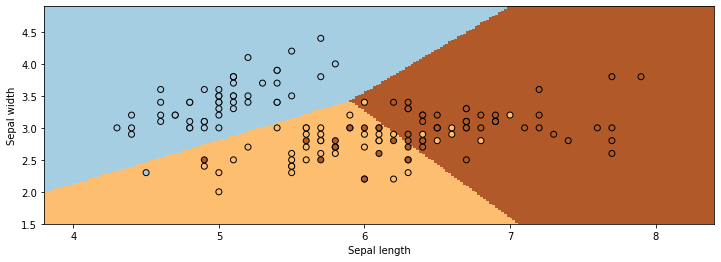

In [7]:
# grafica de la regresion logistica 
plt.figure(figsize=(12,4))

# dataframe a matriz
X = X.values
Y = Y.values

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = rlog.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

Gráficamente podemos decir que el modelo se ajusta bastante bien, puesto que las clasificaciones son adecuadas y el modelo no se confunde entre una clase y otra. Por otro lado, existe valores numéricos que también nos pueden ayudar a convensernos de estos, que son las métricas que se habian definidos con anterioridad. 

Para ello, instanciaremos las distintas metricas del archivo **metrics_classification.py** y calcularemos sus distintos valores.

In [8]:
# metrics

from metrics_classification import *
from sklearn.metrics import confusion_matrix

y_true =  list(Y_test)
y_pred = list(rlog.predict(X_test))

print('Valores:\n')
print('originales: ', y_true)
print('predicho:   ', y_pred)


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores : 'sepal length (cm)' y  'sepal width (cm)'")
print("")
print(df_metrics)

Valores:

originales:  [0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 0, 0, 2, 0, 2]
predicho:    [0, 0, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2]

Matriz de confusion:
 
[[13  1  0]
 [ 0  4  4]
 [ 0  2  6]]

Metricas para los regresores : 'sepal length (cm)' y  'sepal width (cm)'

   accuracy  recall  precision  fscore
0    0.7667  0.7262     0.7238   0.721


Basado en las métricas y en la gráfica, podemos concluir que el ajuste realizado es bastante asertado. 

Otra forma de convencernos que nuestro ajuste es correcto es analizando la [curva AUC–ROC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).

La curva AUC-ROC es la métrica de selección del modelo para el problema de clasificación bi-multi class. ROC es una curva de probabilidad para diferentes clases. ROC nos dice qué tan bueno es el modelo para distinguir las clases dadas, en términos de la probabilidad predicha.

Una curva ROC típica tiene una tasa de falsos positivos (FPR) en el eje X y una tasa de verdaderos positivos (TPR) en el eje Y.

<img src="https://s3.amazonaws.com/stackabuse/media/understanding-roc-curves-python-3.png" width="480" height="480" align="center"/>

El área cubierta por la curva es el área entre la línea naranja (ROC) y el eje. Esta área cubierta es AUC. Cuanto más grande sea el área cubierta, mejores serán los modelos de aprendizaje automático para distinguir las clases dadas. El valor ideal para AUC es 1.

Basado en este concepto, calculemos la curva AUC-ROC para nuestro ejemplo. Cabe destacar que esta curva es efectiva solo para clasificación binaria, por lo que para efectos prácticos convertiremos nuestro **TARGET** en binarios (0 ó 1).

Para efectos prácticos tranformaremos la clase objetivo (en este caso, la clase **0**) a **1**, y el resto de las clases (clase **1** y **2**) las dejaremos en la clase **0**.

In [9]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [10]:
# graficar curva roc
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(9,4))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [11]:
# separar clase 0 del resto
X = iris_df[['sepal length (cm)', 'sepal width (cm)']]
Y = iris_df['TARGET'].apply(lambda x: 1 if x ==2 else 0)
model =  LogisticRegression()

# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 2)

# ajustar modelo 
model.fit(X_train,Y_train)

LogisticRegression()

In [12]:
# calcular score AUC

probs = model.predict_proba(X_test) # predecir probabilidades para X_test
probs_tp = probs[:, 1] # mantener solo las probabilidades de la clase positiva 
       
auc = roc_auc_score(Y_test, probs_tp)  # calcular score AUC 

print('AUC: %.2f' % auc)

AUC: 0.93


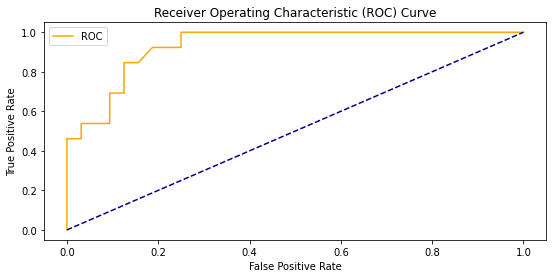

In [13]:
# calcular curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, probs_tp) # obtener curva ROC
plot_roc_curve(fpr, tpr)

### b) Varios modelos de clasificación

Existen varios modelos de clasificación que podemos ir comparando unos con otros, dentro de los cuales estacamos los siguientes:


* [Regresión Logística](https://es.wikipedia.org/wiki/Regresi%C3%B3n_log%C3%ADstica)
* [Arboles de Decision](https://es.wikipedia.org/wiki/%C3%81rbol_de_decisi%C3%B3n)
* [Random Forest](https://es.wikipedia.org/wiki/Random_forest)
* [SVM](https://es.wikipedia.org/wiki/M%C3%A1quinas_de_vectores_de_soporte) 

Nos basaremos en un ejemplo de **sklearn** que muestra los resultados de aplicar estos cuatro modelos sobre tres conjunto de datos distintos ( **make_moons**, **make_circles**, **make_classification**). Además, se crea un rutina para comparar los resultados de las distintas métricas.

### a) Gráficos

Similar al gráfico aplicado al conjunto de datos Iris, aca se realiza el mismo ejercicio pero para tres conjunto de datos sobre los distintos modelos.

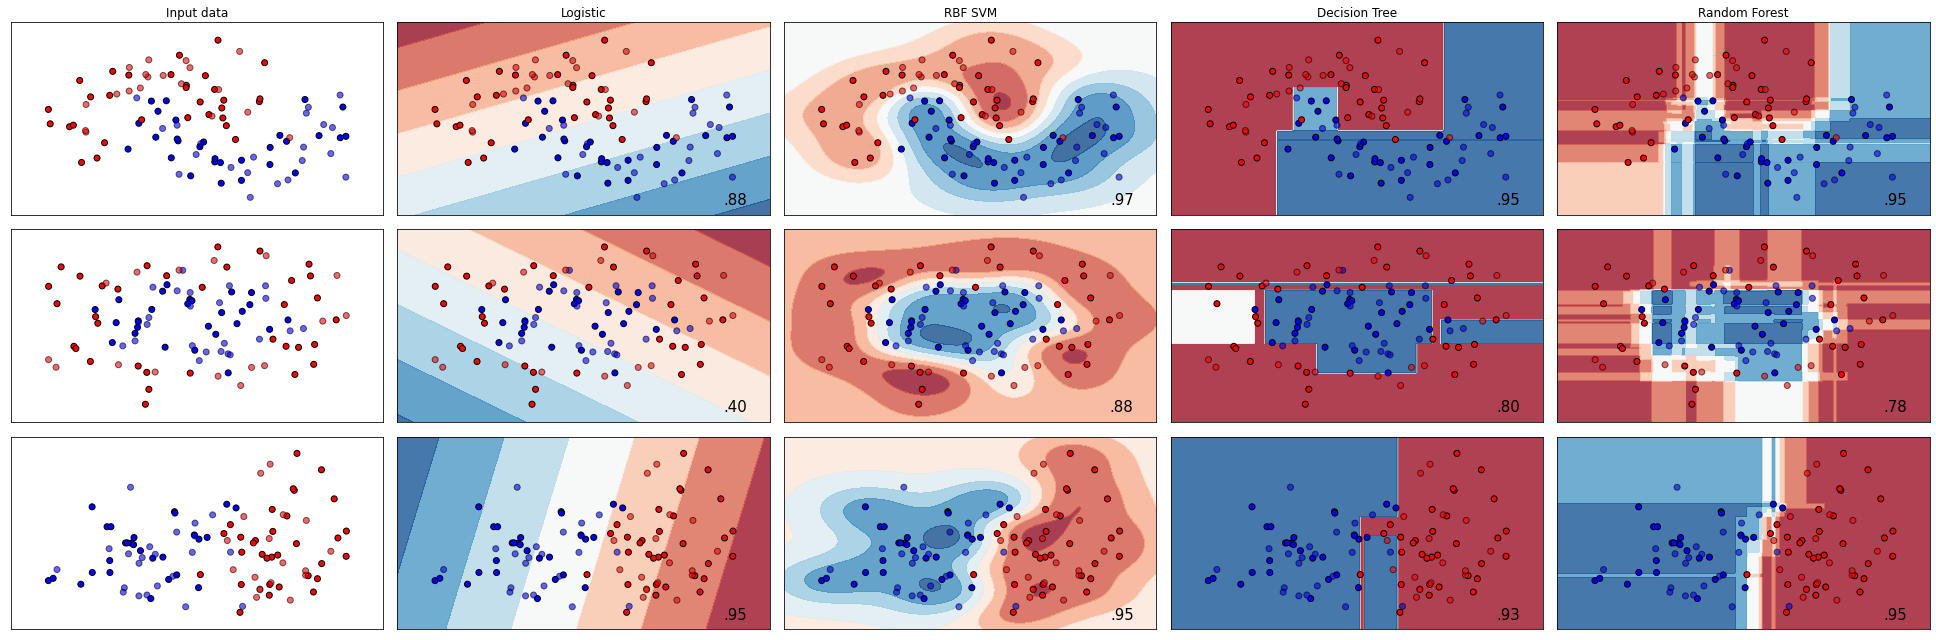

In [14]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from matplotlib.colors import ListedColormap


h = .02  # step size in the mesh

names = ["Logistic",
         "RBF SVM", 
         "Decision Tree", 
         "Random Forest"
]

classifiers = [
    LogisticRegression(),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
]



X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]



figure = plt.figure(figsize=(27, 9))
i = 1



# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

### b) Métricas

Dado que el sistema de calcular métricas sigue el mismo formato, solo cambiando el conjunto de datos y el modelo, se decide realizar una clase que automatice este proceso.

In [15]:
from metrics_classification import *

class SklearnClassificationModels:
    def __init__(self,model,name_model):

        self.model = model
        self.name_model = name_model
        
    @staticmethod
    def test_train_model(X,y,n_size):
        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=n_size , random_state=42)
        return X_train, X_test, y_train, y_test
    
    def fit_model(self,X,y,test_size):
        X_train, X_test, y_train, y_test = self.test_train_model(X,y,test_size )
        return self.model.fit(X_train, y_train) 
    
    def df_testig(self,X,y,test_size):
        X_train, X_test, y_train, y_test = self.test_train_model(X,y,test_size )
        model_fit = self.model.fit(X_train, y_train)
        preds = model_fit.predict(X_test)
        df_temp = pd.DataFrame(
            {
                'y':y_test,
                'yhat': model_fit.predict(X_test)
            }
        )
        
        return df_temp
    
    def metrics(self,X,y,test_size):
        df_temp = self.df_testig(X,y,test_size)
        df_metrics = summary_metrics(df_temp)
        df_metrics['model'] = self.name_model
        
        return df_metrics


In [16]:
# metrics 

import itertools

# nombre modelos
names_models = ["Logistic",
         "RBF SVM", 
         "Decision Tree", 
         "Random Forest"
]

# modelos
classifiers = [
    LogisticRegression(),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
]

# datasets
names_dataset = ['make_moons',
                 'make_circles',
                 'linearly_separable'
                ]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]


# juntar informacion
list_models = list(zip(names_models,classifiers))
list_dataset = list(zip(names_dataset,datasets))

frames = []
for x in itertools.product(list_models, list_dataset):
    
    name_model = x[0][0]
    classifier = x[0][1]
    
    name_dataset = x[1][0]
    dataset = x[1][1]
    
    X = dataset[0]
    Y =  dataset[1]
    
    fit_model =  SklearnClassificationModels( classifier,name_model)
    df = fit_model.metrics(X,Y,0.2)
    df['dataset'] = name_dataset
    
    frames.append(df)

/home/falfaro/.cache/pypoetry/virtualenvs/pymessi-xyyw3p3f-py3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# juntar resultados
pd.concat(frames)

,accuracy,recall,precision,fscore,model,dataset
0,0.90,0.9000,0.9000,0.9000,Logistic,make_moons
0,0.35,0.5000,0.1750,0.2593,Logistic,make_circles
0,0.95,0.9545,0.9500,0.9499,Logistic,linearly_separable
0,0.95,0.9500,0.9545,0.9499,RBF SVM,make_moons
0,0.80,0.8462,0.8182,0.7980,RBF SVM,make_circles
0,0.95,0.9545,0.9500,0.9499,RBF SVM,linearly_separable
0,0.95,0.9500,0.9545,0.9499,Decision Tree,make_moons
0,0.75,0.8077,0.7917,0.7494,Decision Tree,make_circles
0,0.85,0.8535,0.8500,0.8496,Decision Tree,linearly_separable
0,0.95,0.9500,0.9545,0.9499,Random Forest,make_moons


## Referencia

1. [Supervised learning](https://scikit-learn.org/stable/supervised_learning.html)